In [ ]:
# Imports
library(Seurat)
library(SingleCellExperiment)
library(SingleR)
library(celldex)    
library(ggplot2)
library(clustree)
library(stringr) 
library(gridExtra)
library(dplyr)
library(GPTCelltype)
library(openai)

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=20, repr.plot.height=12)

# Read myeloid data of mouse
myeloid_data <- readRDS("../../../data/R Objects/Myeloid R Objects/all_mice_myeloid_data_v3.rds")

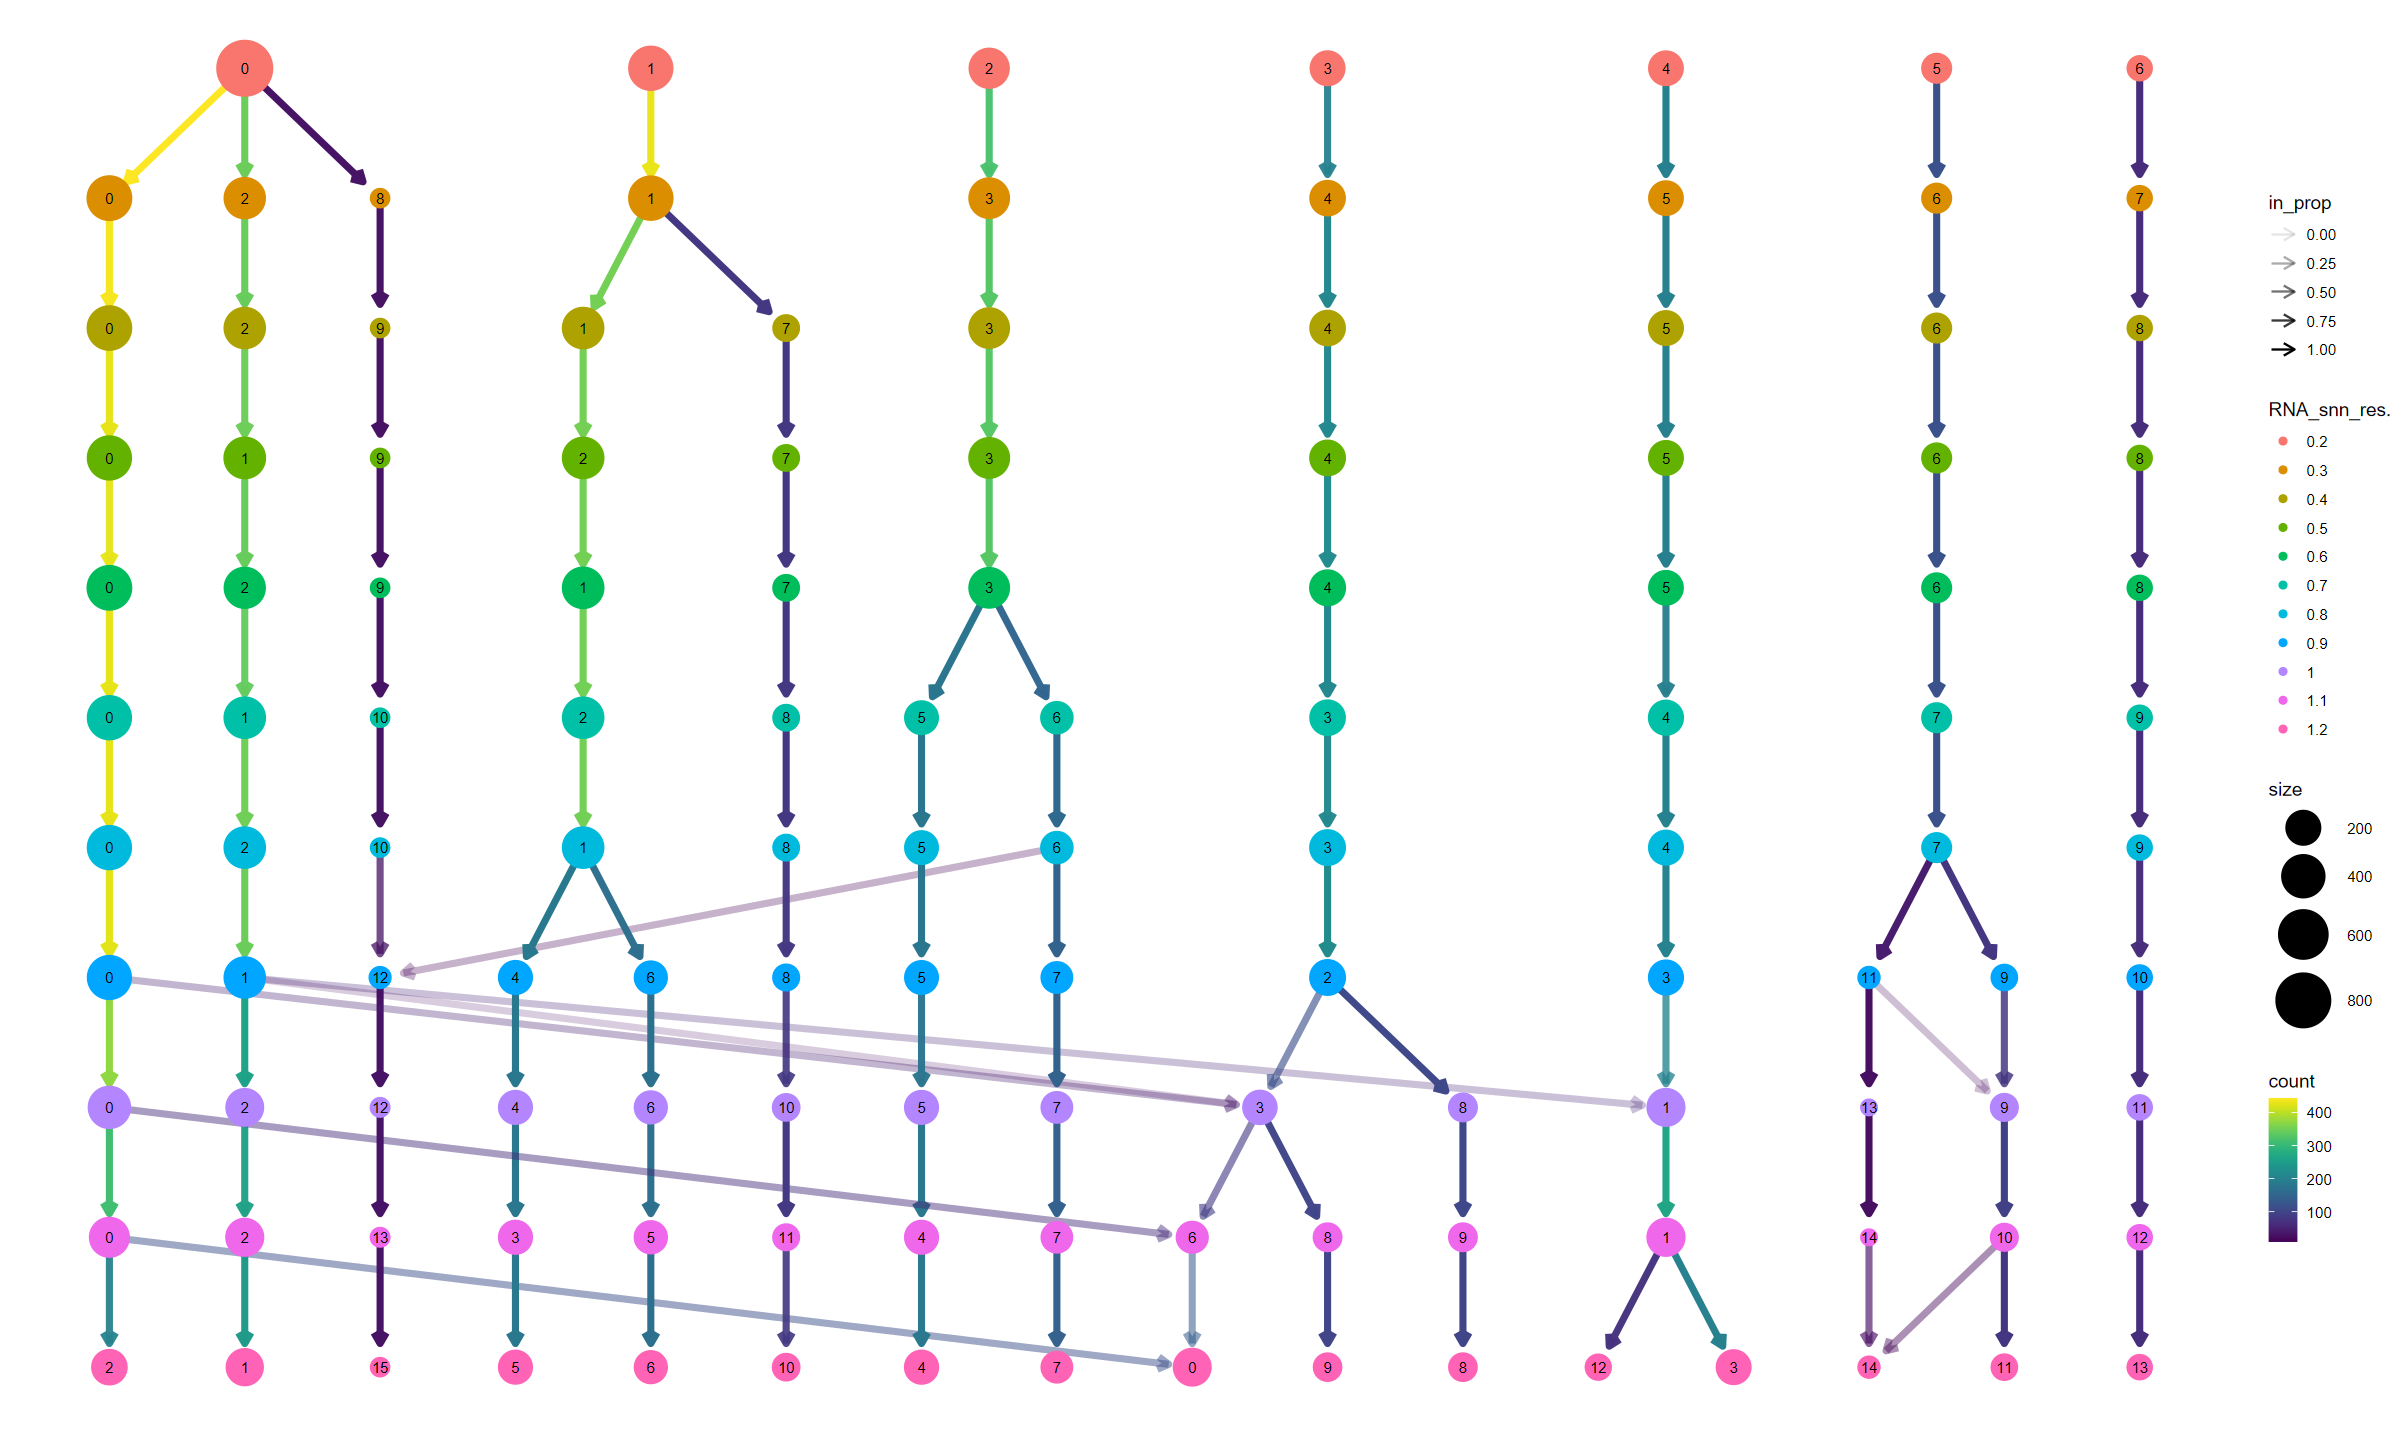

In [8]:
# This cell is meant to analyze the different resolutions and see which one is the best
clustree(myeloid_data, prefix= "RNA_snn_res.", layout = "sugiyama")

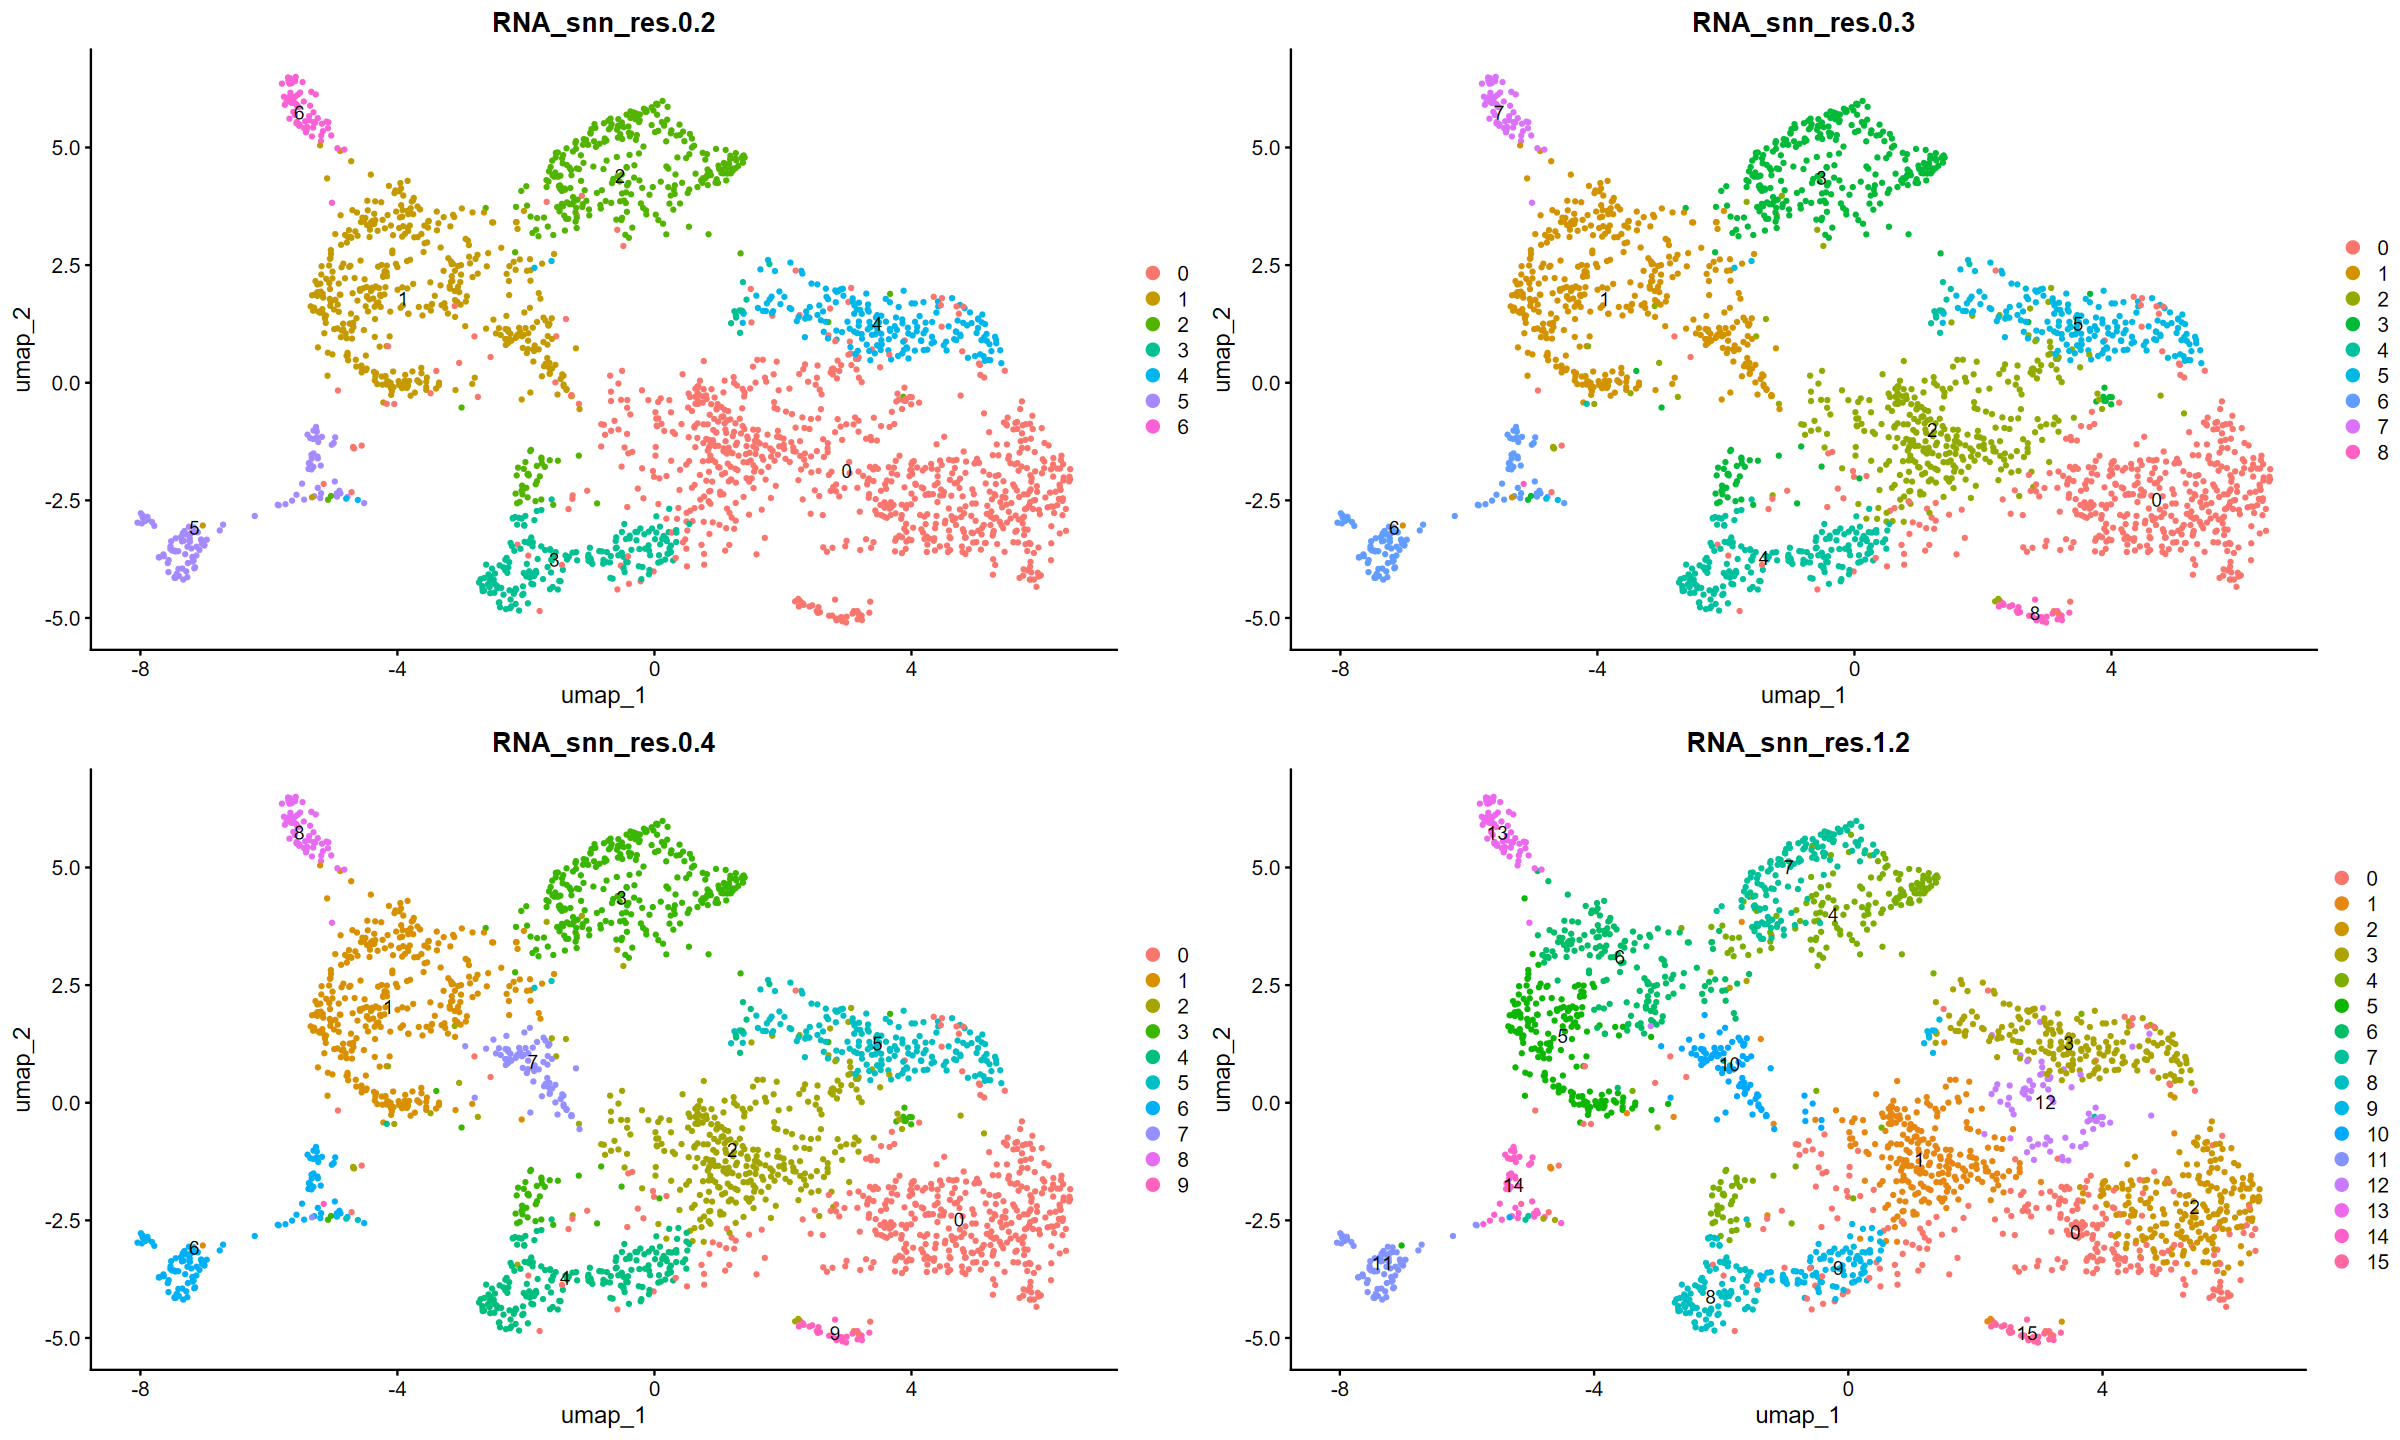

In [11]:
# Get DimPlots of different resolutions
res_1 <- DimPlot(myeloid_data, reduction = "umap", group.by = "RNA_snn_res.0.2", label = T)
res_2 <- DimPlot(myeloid_data, reduction = "umap", group.by = "RNA_snn_res.0.3", label = T)
res_3 <- DimPlot(myeloid_data, reduction = "umap", group.by = "RNA_snn_res.0.4", label = T)
res_4 <- DimPlot(myeloid_data, reduction = "umap", group.by = "RNA_snn_res.1.2", label = T)

# Plot
grid.arrange(res_1, res_2, res_3, res_4, ncol=2)

# Assign the slot "Seurat Cluster" to the desired resolution
myeloid_data$seurat_clusters <- myeloid_data$`RNA_snn_res.0.2`

In [ ]:
# View distribution of idents before assigning resolution
table(Idents(myeloid_data))

# Assign resolution to identity
myeloid_data <- SetIdent(myeloid_data, value = "RNA_snn_res.0.2")

# View distribution of idents after assigning resolution
table(Idents(myeloid_data))


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14 
312 268 266 184 183 169 149 142 102 102  92  80  65  30  25 


  0   1   2   3   4   5   6 
845 428 318 200 197 117  64 

Calculating cluster 0



Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Warning message in DoHeatmap(myeloid_data, features = top10$gene, size = 1, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Slco5a1, 9530068e07rik, 37316, 5031425e22rik, 37500"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


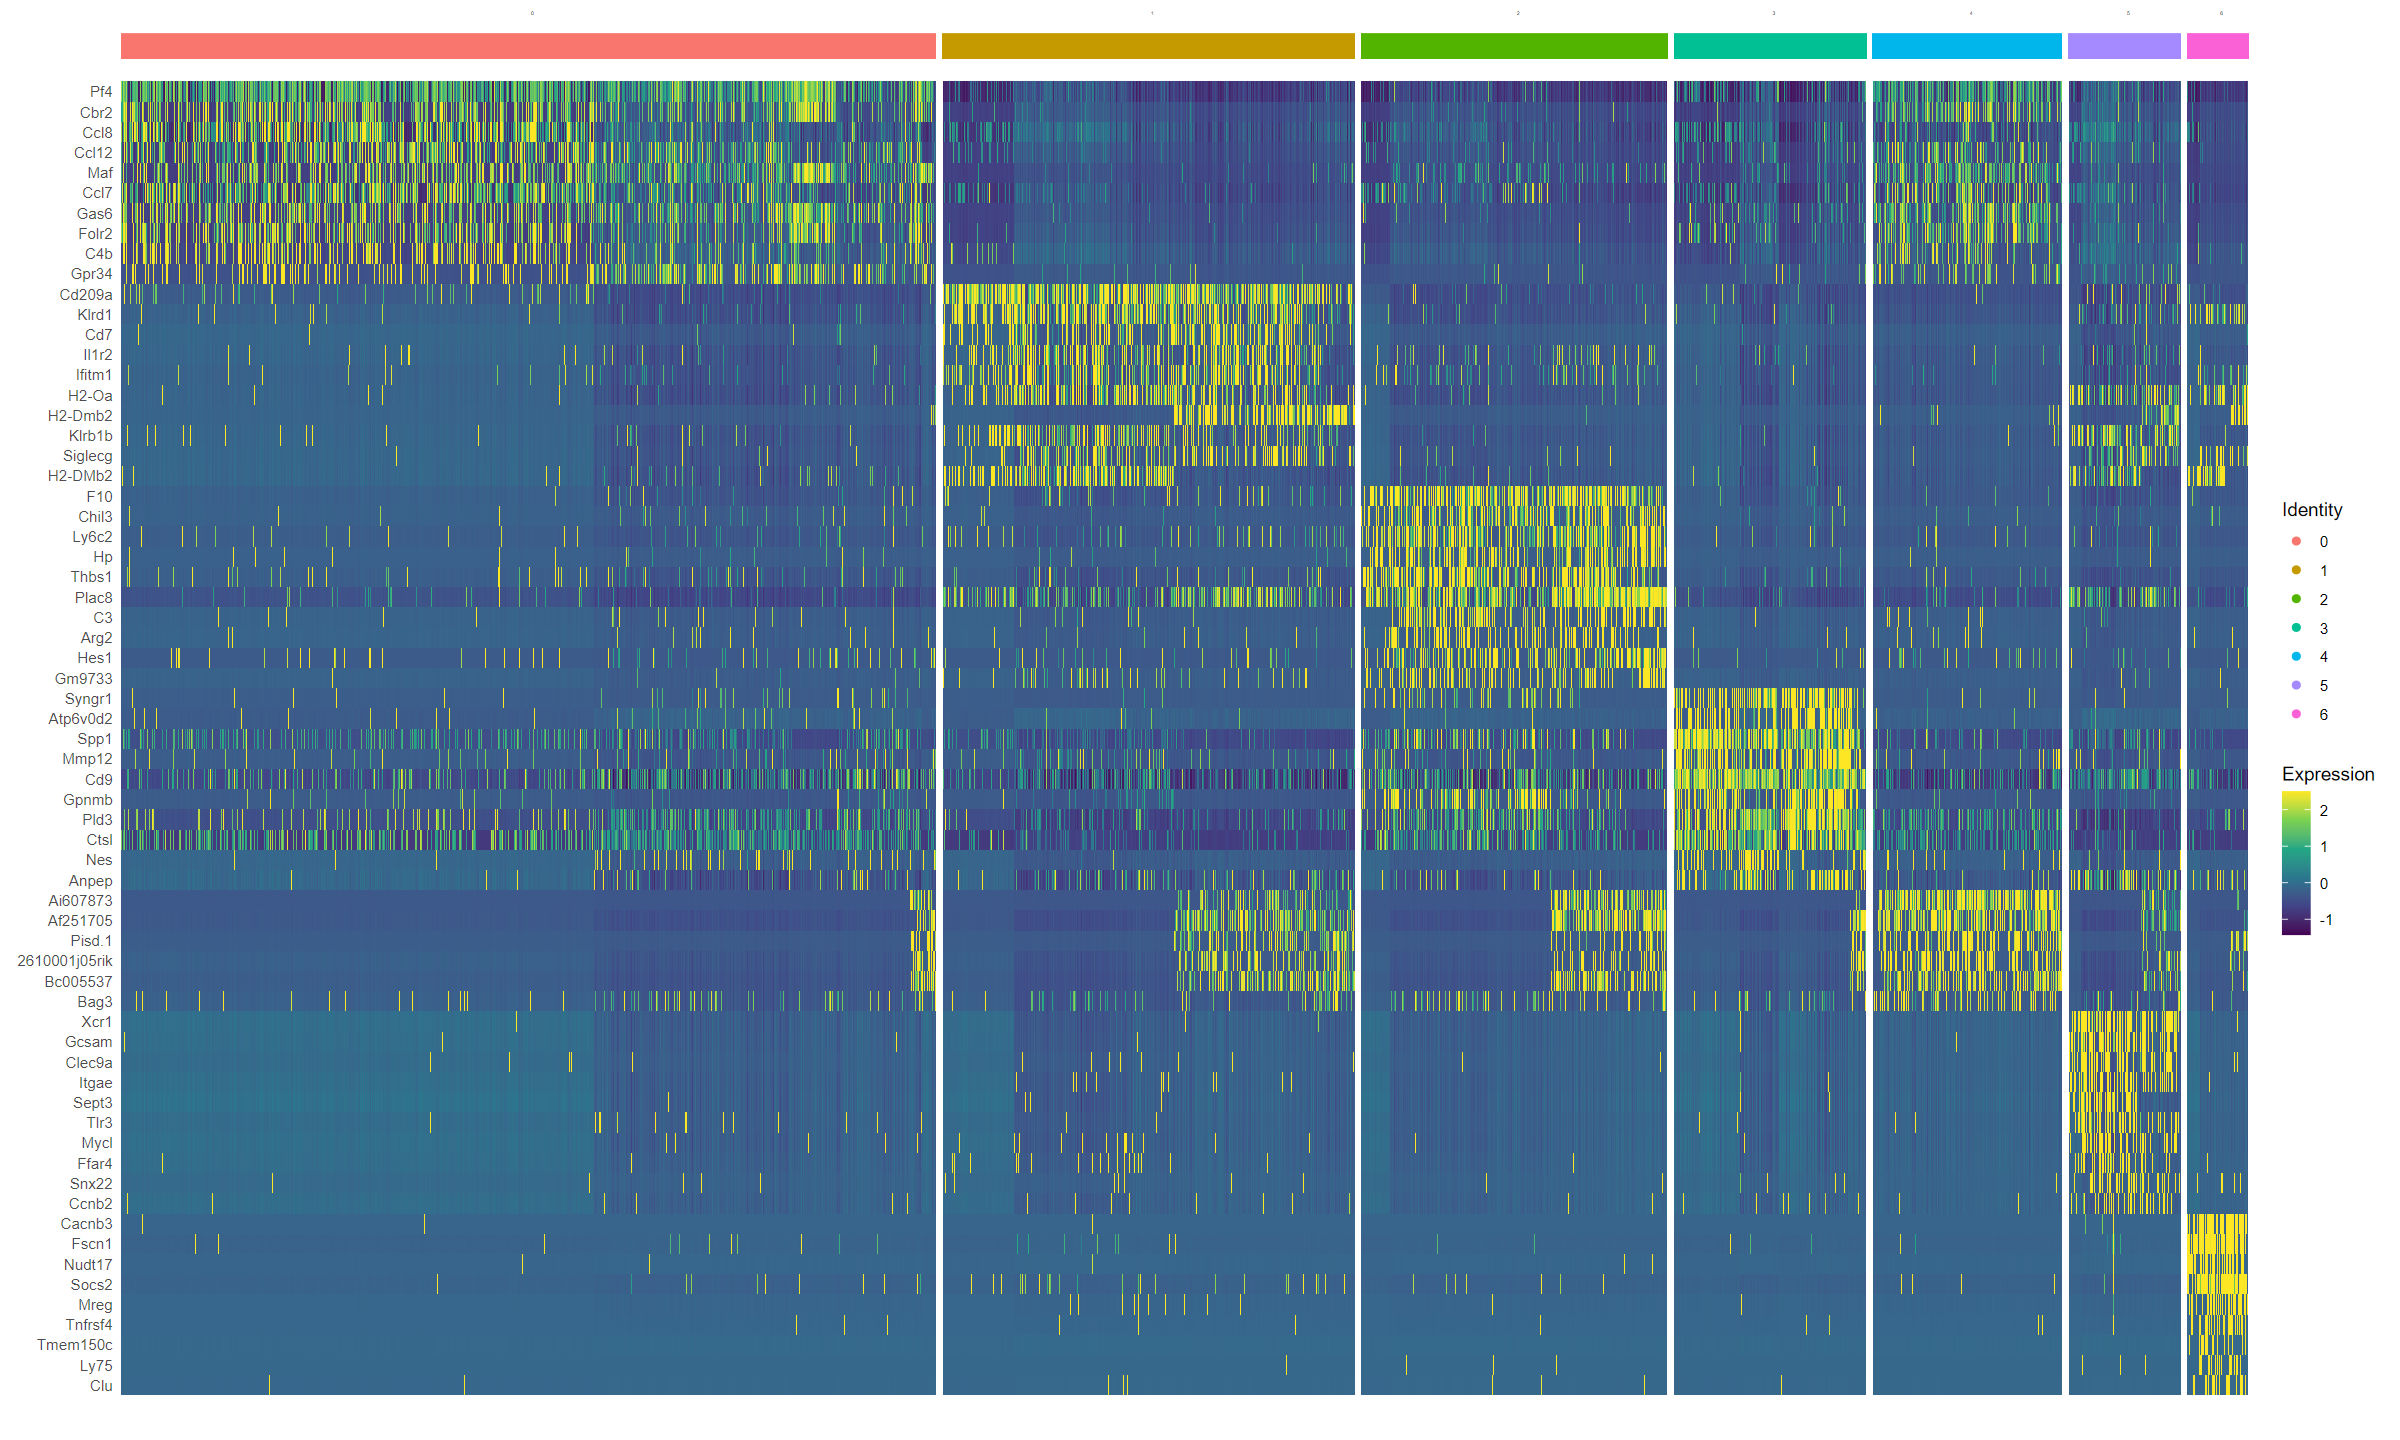

In [ ]:
# Find markers for each cluster
markers <- FindAllMarkers(myeloid_data, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Heatmap
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)
DoHeatmap(myeloid_data, features = top10$gene, size=1, angle=0, raster=FALSE) &
  scale_fill_viridis_c(option="blue",na.value = "white")

In [ ]:
# Filter markers
markers %>%  group_by(cluster) %>% filter(as.numeric(as.character(cluster)) > 2) %>% filter(p_val_adj < 0.05) %>% slice_max(order_by = avg_log2FC, n = 10) %>% arrange(cluster, desc(pct.1)) 

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene         
1   8.907694e-71  2.878296  0.875 0.431  2.731277e-66 3       Cd9          
2   4.826349e-84  4.378843  0.830 0.288  1.479855e-79 3       Spp1         
3   3.442688e-46  3.696033  0.785 0.405  1.055597e-41 3       Ctsl         
4   4.941734e-62  2.920879  0.730 0.267  1.515234e-57 3       Pld3         
5   2.758544e-83  4.718188  0.555 0.093  8.458248e-79 3       Mmp12        
6  1.858942e-121  4.778183  0.540 0.047 5.699889e-117 3       Syngr1       
7   1.283423e-66  4.001766  0.505 0.093  3.935231e-62 3       Gpnmb        
8  8.810665e-113  6.064276  0.400 0.021 2.701526e-108 3       Atp6v0d2     
9   1.356889e-31  2.937131  0.365 0.098  4.160493e-27 3       Anpep        
10  5.566175e-46  3.632992  0.265 0.031  1.706701e-41 3       Nes          
11 1.670016e-126  3.652291  0.670 0.079 5.120602e-122 4       Ai607873     
12  5.938483e-61  2.491360  0.553 0.118  1.820858e-56 4       Af251705     
13  2.300778e-44  2.435977  0.426 0.092  7.054647e-40 4       Bc005537     
14  3.865395e-49  2.925127  0.381 0.066  1.185208e-44 4       2610001j05rik
15  5.809482e-47  2.849920  0.376 0.068  1.781303e-42 4       37500        
16  1.485963e-49  2.837010  0.376 0.063  4.556260e-45 4       Pisd.1       
17  2.896197e-14  2.505018  0.279 0.107  8.880318e-10 4       Bag3         
18  7.419728e-26  2.501596  0.279 0.066  2.275037e-21 4       9530068e07rik
19  9.888547e-27  2.490208  0.279 0.064  3.032026e-22 4       37316        
20  8.177675e-31  2.677002  0.254 0.045  2.507439e-26 4       5031425e22rik
21 3.707294e-230  7.463514  0.547 0.003 1.136730e-225 5       Xcr1         
22 1.053045e-205  6.747122  0.496 0.003 3.228845e-201 5       Gcsam        
23 9.221762e-147  5.814999  0.436 0.008 2.827577e-142 5       Clec9a       
24 2.386002e-137  6.241208  0.402 0.007 7.315961e-133 5       Itgae        
25 6.019657e-105  4.669894  0.376 0.012 1.845747e-100 5       Tlr3         
26 1.702628e-131  7.163781  0.333 0.003 5.220597e-127 5       Sept3        
27  3.144957e-93  4.726873  0.333 0.011  9.643067e-89 5       Mycl         
28  2.709309e-73  4.510235  0.282 0.011  8.307283e-69 5       Ffar4        
29  1.216370e-70  4.431914  0.282 0.012  3.729634e-66 5       Snx22        
30  8.794360e-59  4.456411  0.256 0.013  2.696527e-54 5       Ccnb2        
31 1.625467e-184  6.928043  0.797 0.025 4.984007e-180 6       Socs2        
32 3.151167e-226  9.569868  0.781 0.015 9.662109e-222 6       Fscn1        
33 3.554089e-278  8.714827  0.688 0.003 1.089755e-273 6       Cacnb3       
34 1.789773e-225  8.950903  0.562 0.003 5.487803e-221 6       Nudt17       
35 3.381719e-155  7.484498  0.484 0.007 1.036903e-150 6       Mreg         
36 5.975086e-129  7.726042  0.406 0.006 1.832081e-124 6       Tnfrsf4      
37  6.599712e-90  8.147045  0.297 0.005  2.023604e-85 6       Clu          
38 1.357343e-100  7.226514  0.297 0.003  4.161884e-96 6       Ly75         
39 3.006641e-117 10.520785  0.250 0.000 9.218962e-113 6       Tmem150c     
40 3.300218e-110 10.018461  0.250 0.000 1.011913e-105 6       Slco5a1

In [ ]:
# Marker genes 
myeloid_data <- SetIdent(myeloid_data, value = "seurat_clusters")
#features_macrophage <- c("Cd14", "Cd68", "Fcgr3", "Fcgr1", "Ccr5", "Cd163", "Fut4", "Itgax", "Itgam", "Cd80", "Cd86")
#features_monocytes <- c("C1qc", "C1qb", "C1qa", "Mertk", "Pga5", "Pcdh12", "Aldh1a1", "C2", "Avpr2", "Cxcr3", "Cttnbp2") # https://www.proteinatlas.org/humanproteome/single+cell/immune+cell/monocytes#classical_monocytes
#features_monocytes <- c("Itgam", "Csf1r", "Ly6c1", "Sell", "Itgax", "Ccr1", "Ccr5")
features_monocytes <- c("Irf7", "Mx1", "Il1rn", "Ifit1", "Ifit3", "Cxcl10", "Csf1r", "Mnda", "Clec4a2", "Ly6c2", "Ly6c1", "Cd44")
features_macrophage <- c("Lyz2", "Csf1r", "Cd68", "Aif1", "Cybb", "Cd14", "Dab2", "Ccl6", "Clec4a2", "Ms4a7", "H2-Ab1", "H2-Eb1")
features_dcs <- c("Ctss", "H2-Ab1", "H2-Eb1", "Batf3", "Xcr1", "Irf8", "Aif1", "Cd83", "H2afy", "Flt3", "Napsa", "H2-Dma")
features_monocytes <- c("Csf1r", "Itgam", "Cx3cr1", "Ly6c1", "Ly6c2", "Ccr2", "Sell", "Spn", "Irf7", "Mx1", "Il1rn")


# Add a module score to the Seurat object
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_macrophage), name = "FeatureGeneScore_macrophages")
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_monocytes), name = "FeatureGeneScore_monocytes")
myeloid_data <- AddModuleScore(myeloid_data, features = list(features_dcs), name = "FeatureGeneScore_dcs")

# Vln plots
macrophage_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_macrophages1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for macrophage markers")
monocyte_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_monocytes1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for monocyte markers")
dc_vln <- VlnPlot(myeloid_data, features = "FeatureGeneScore_dcs1", group.by = "seurat_clusters") + 
  ggtitle("FeatureGeneScores for dendritic cell markers")

# Visualizing DotPlots to view marker genes
macrophage_dot <- DotPlot(myeloid_data, features = features_macrophage) + 
  ggtitle("Markers for Macrophages") + RotatedAxis()

monocyte_dot <- DotPlot(myeloid_data, features = features_monocytes) + 
  ggtitle("Markers for monocytes") + RotatedAxis()
dc_dot <- DotPlot(myeloid_data, features = features_dcs) + 
  ggtitle("Markers for dendritic cells") + RotatedAxis()


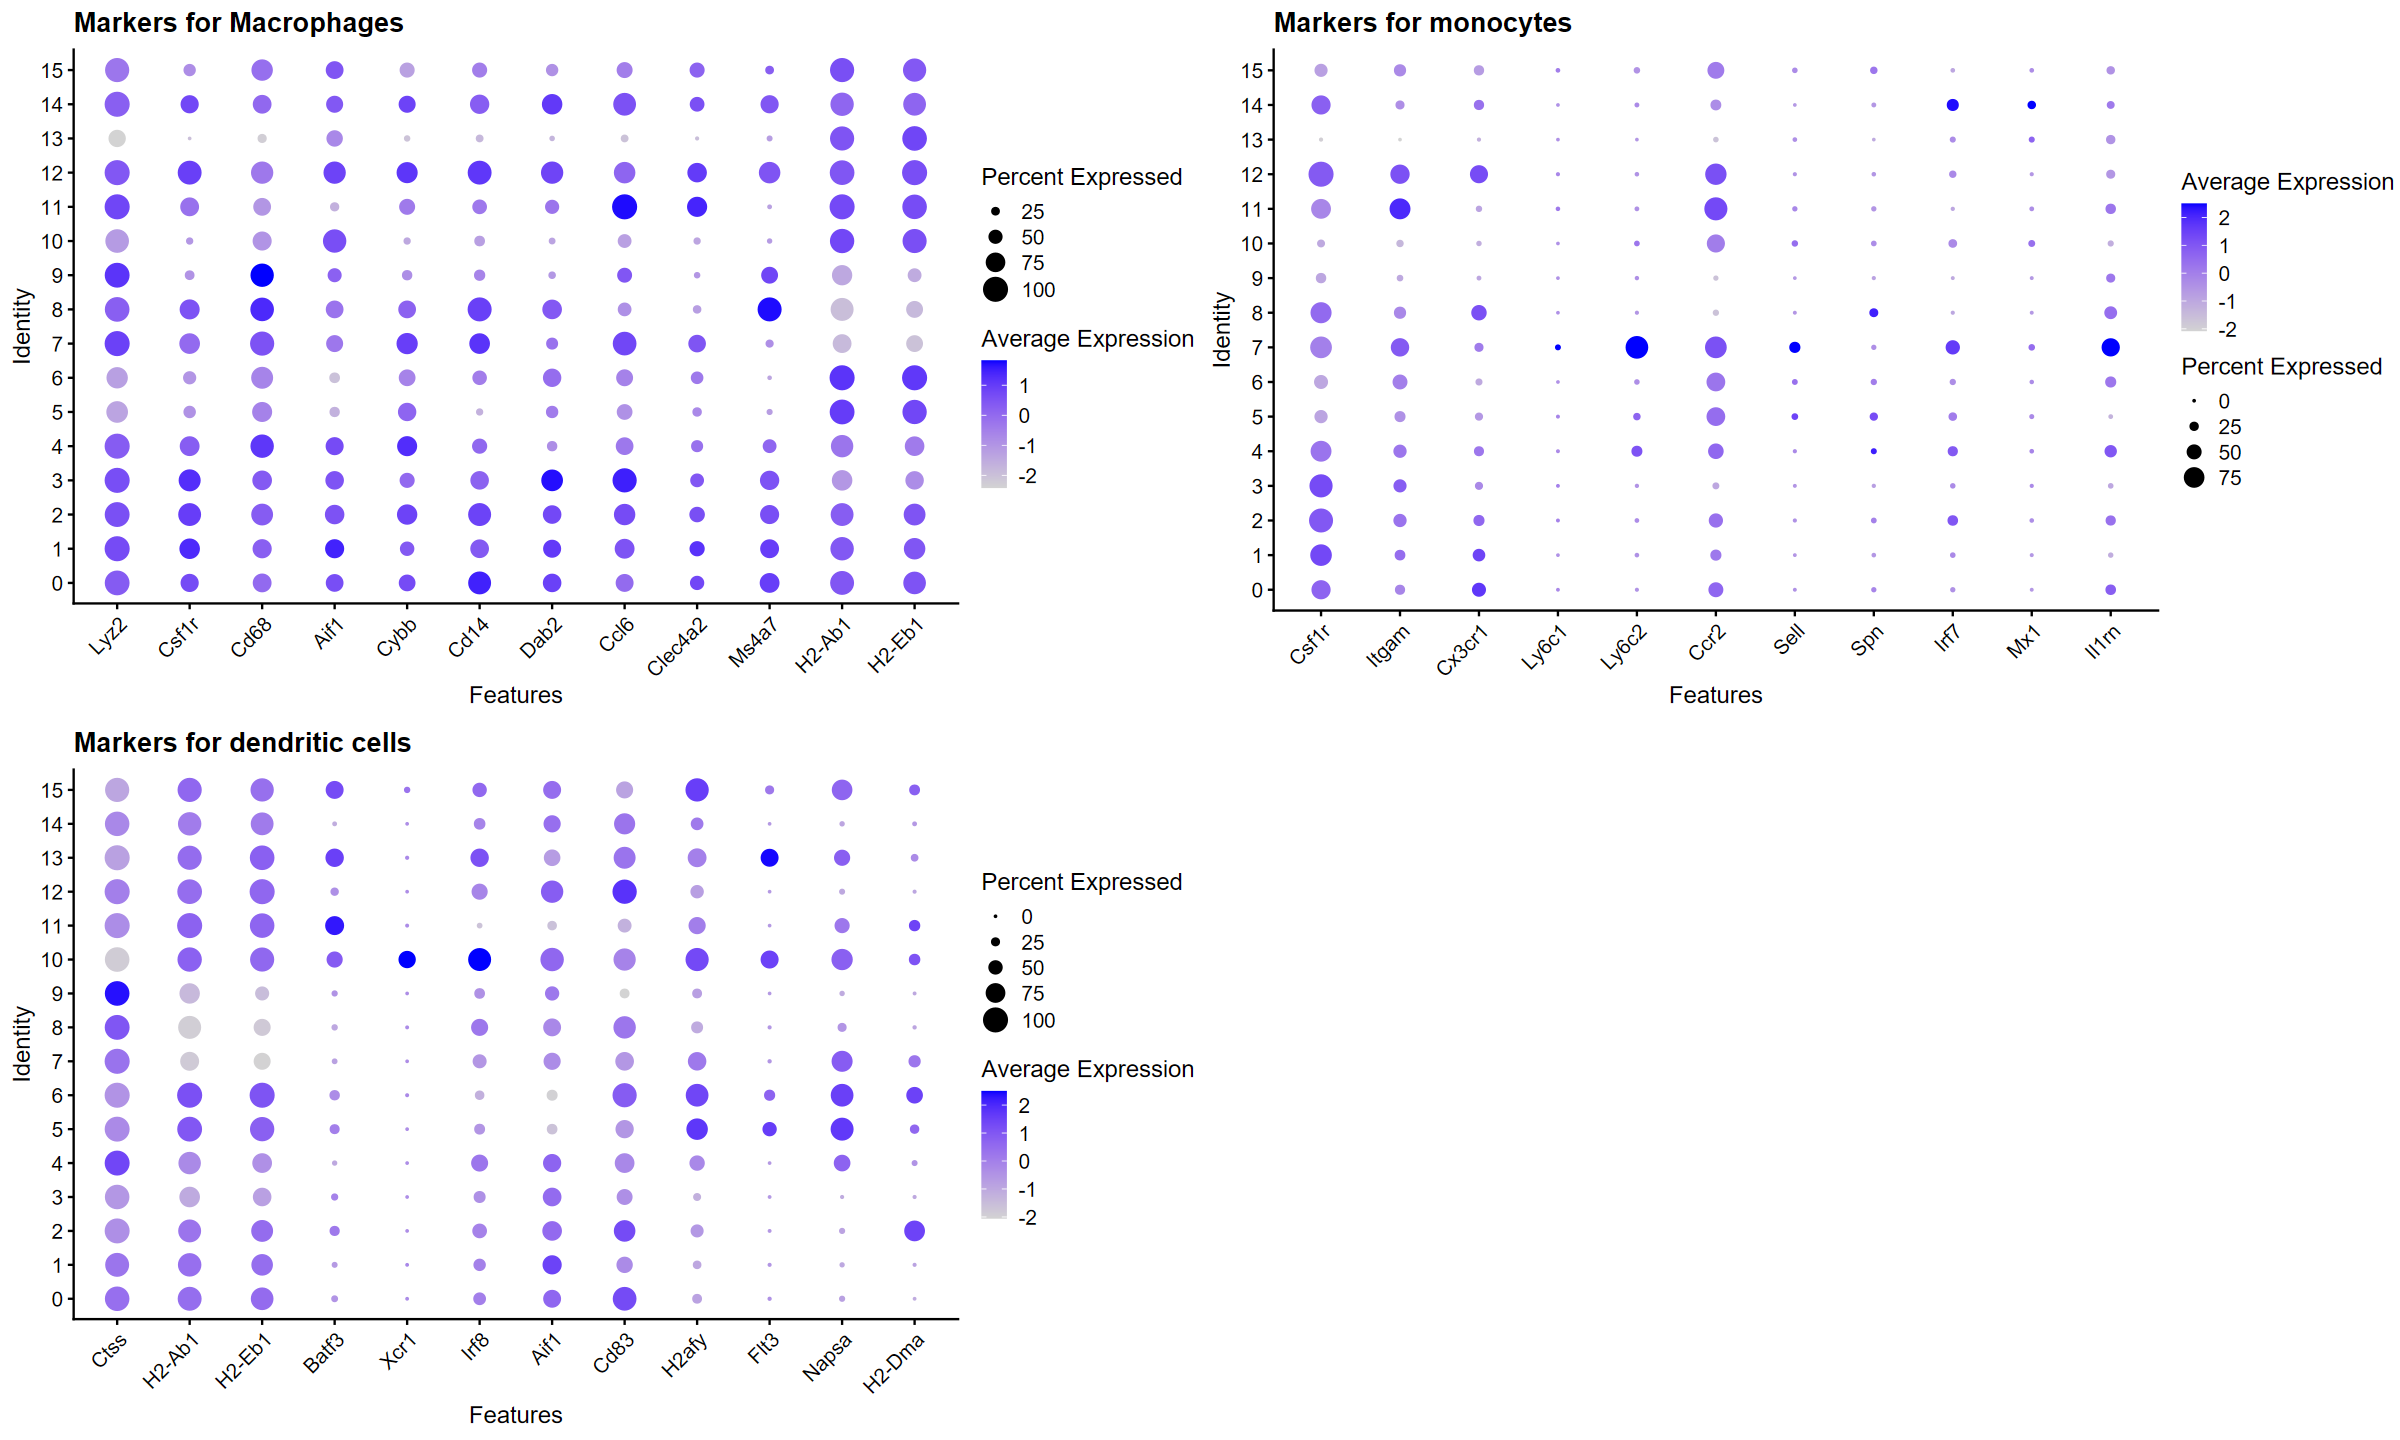

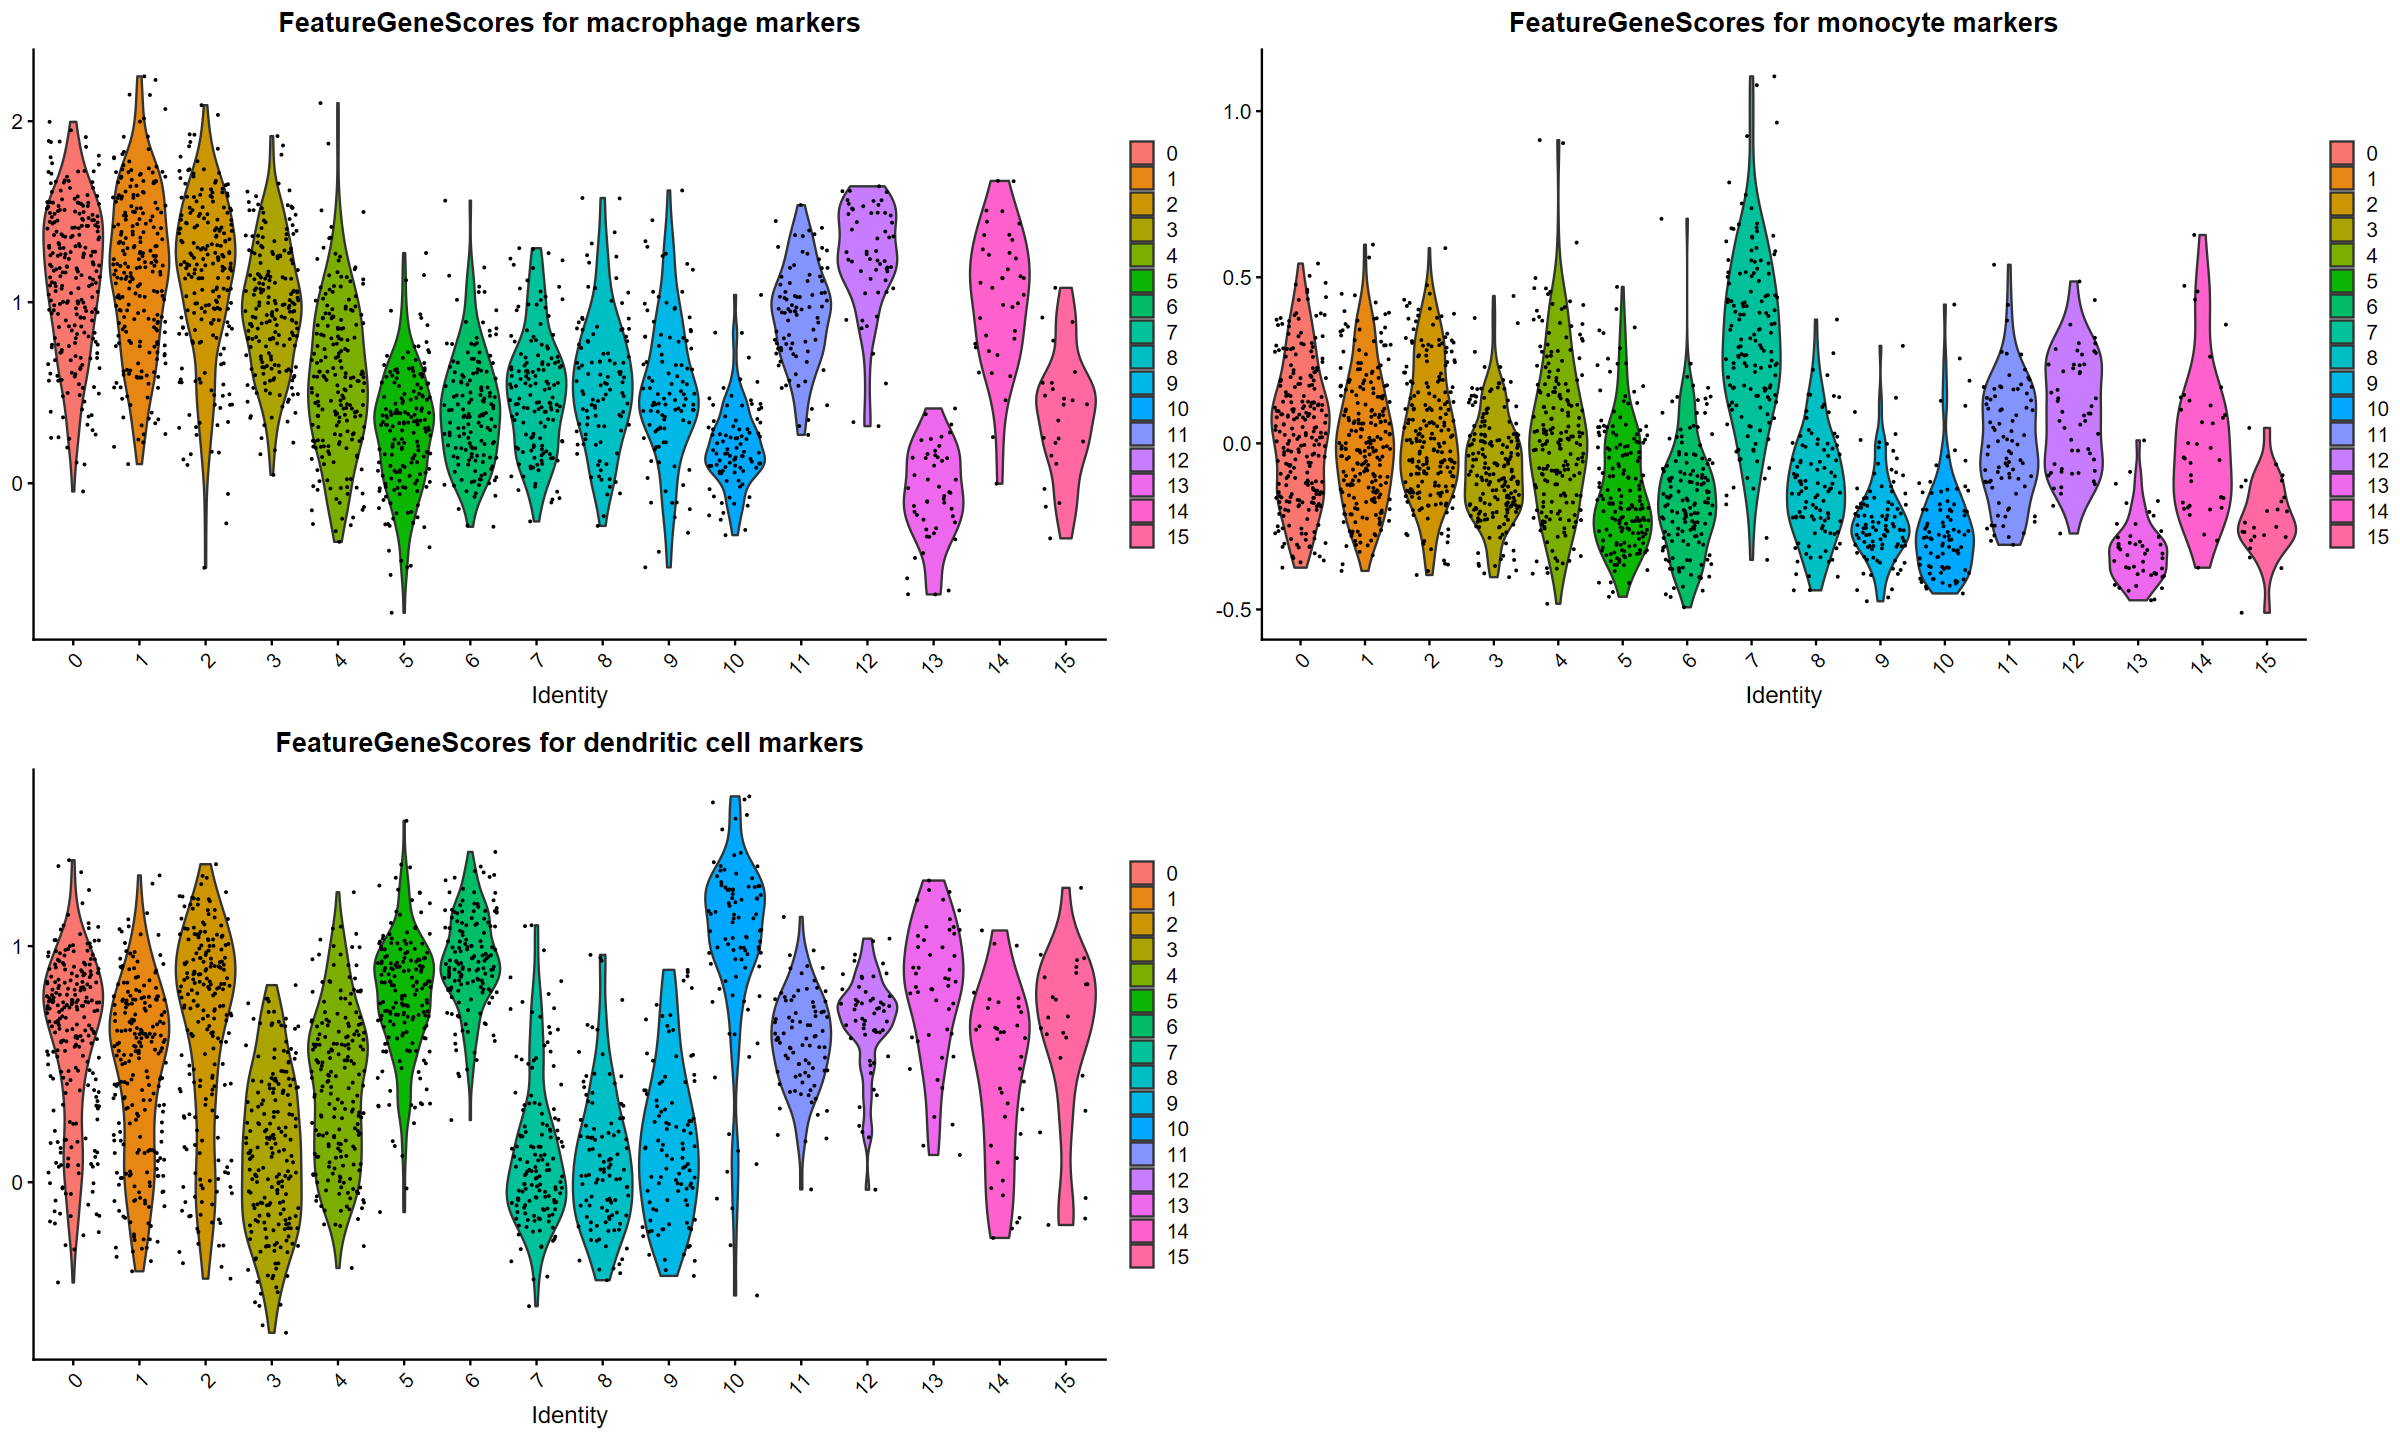

In [18]:
# Plot
grid.arrange(macrophage_dot, monocyte_dot, dc_dot, ncol = 2)
grid.arrange(macrophage_vln, monocyte_vln, dc_vln, ncol=2)

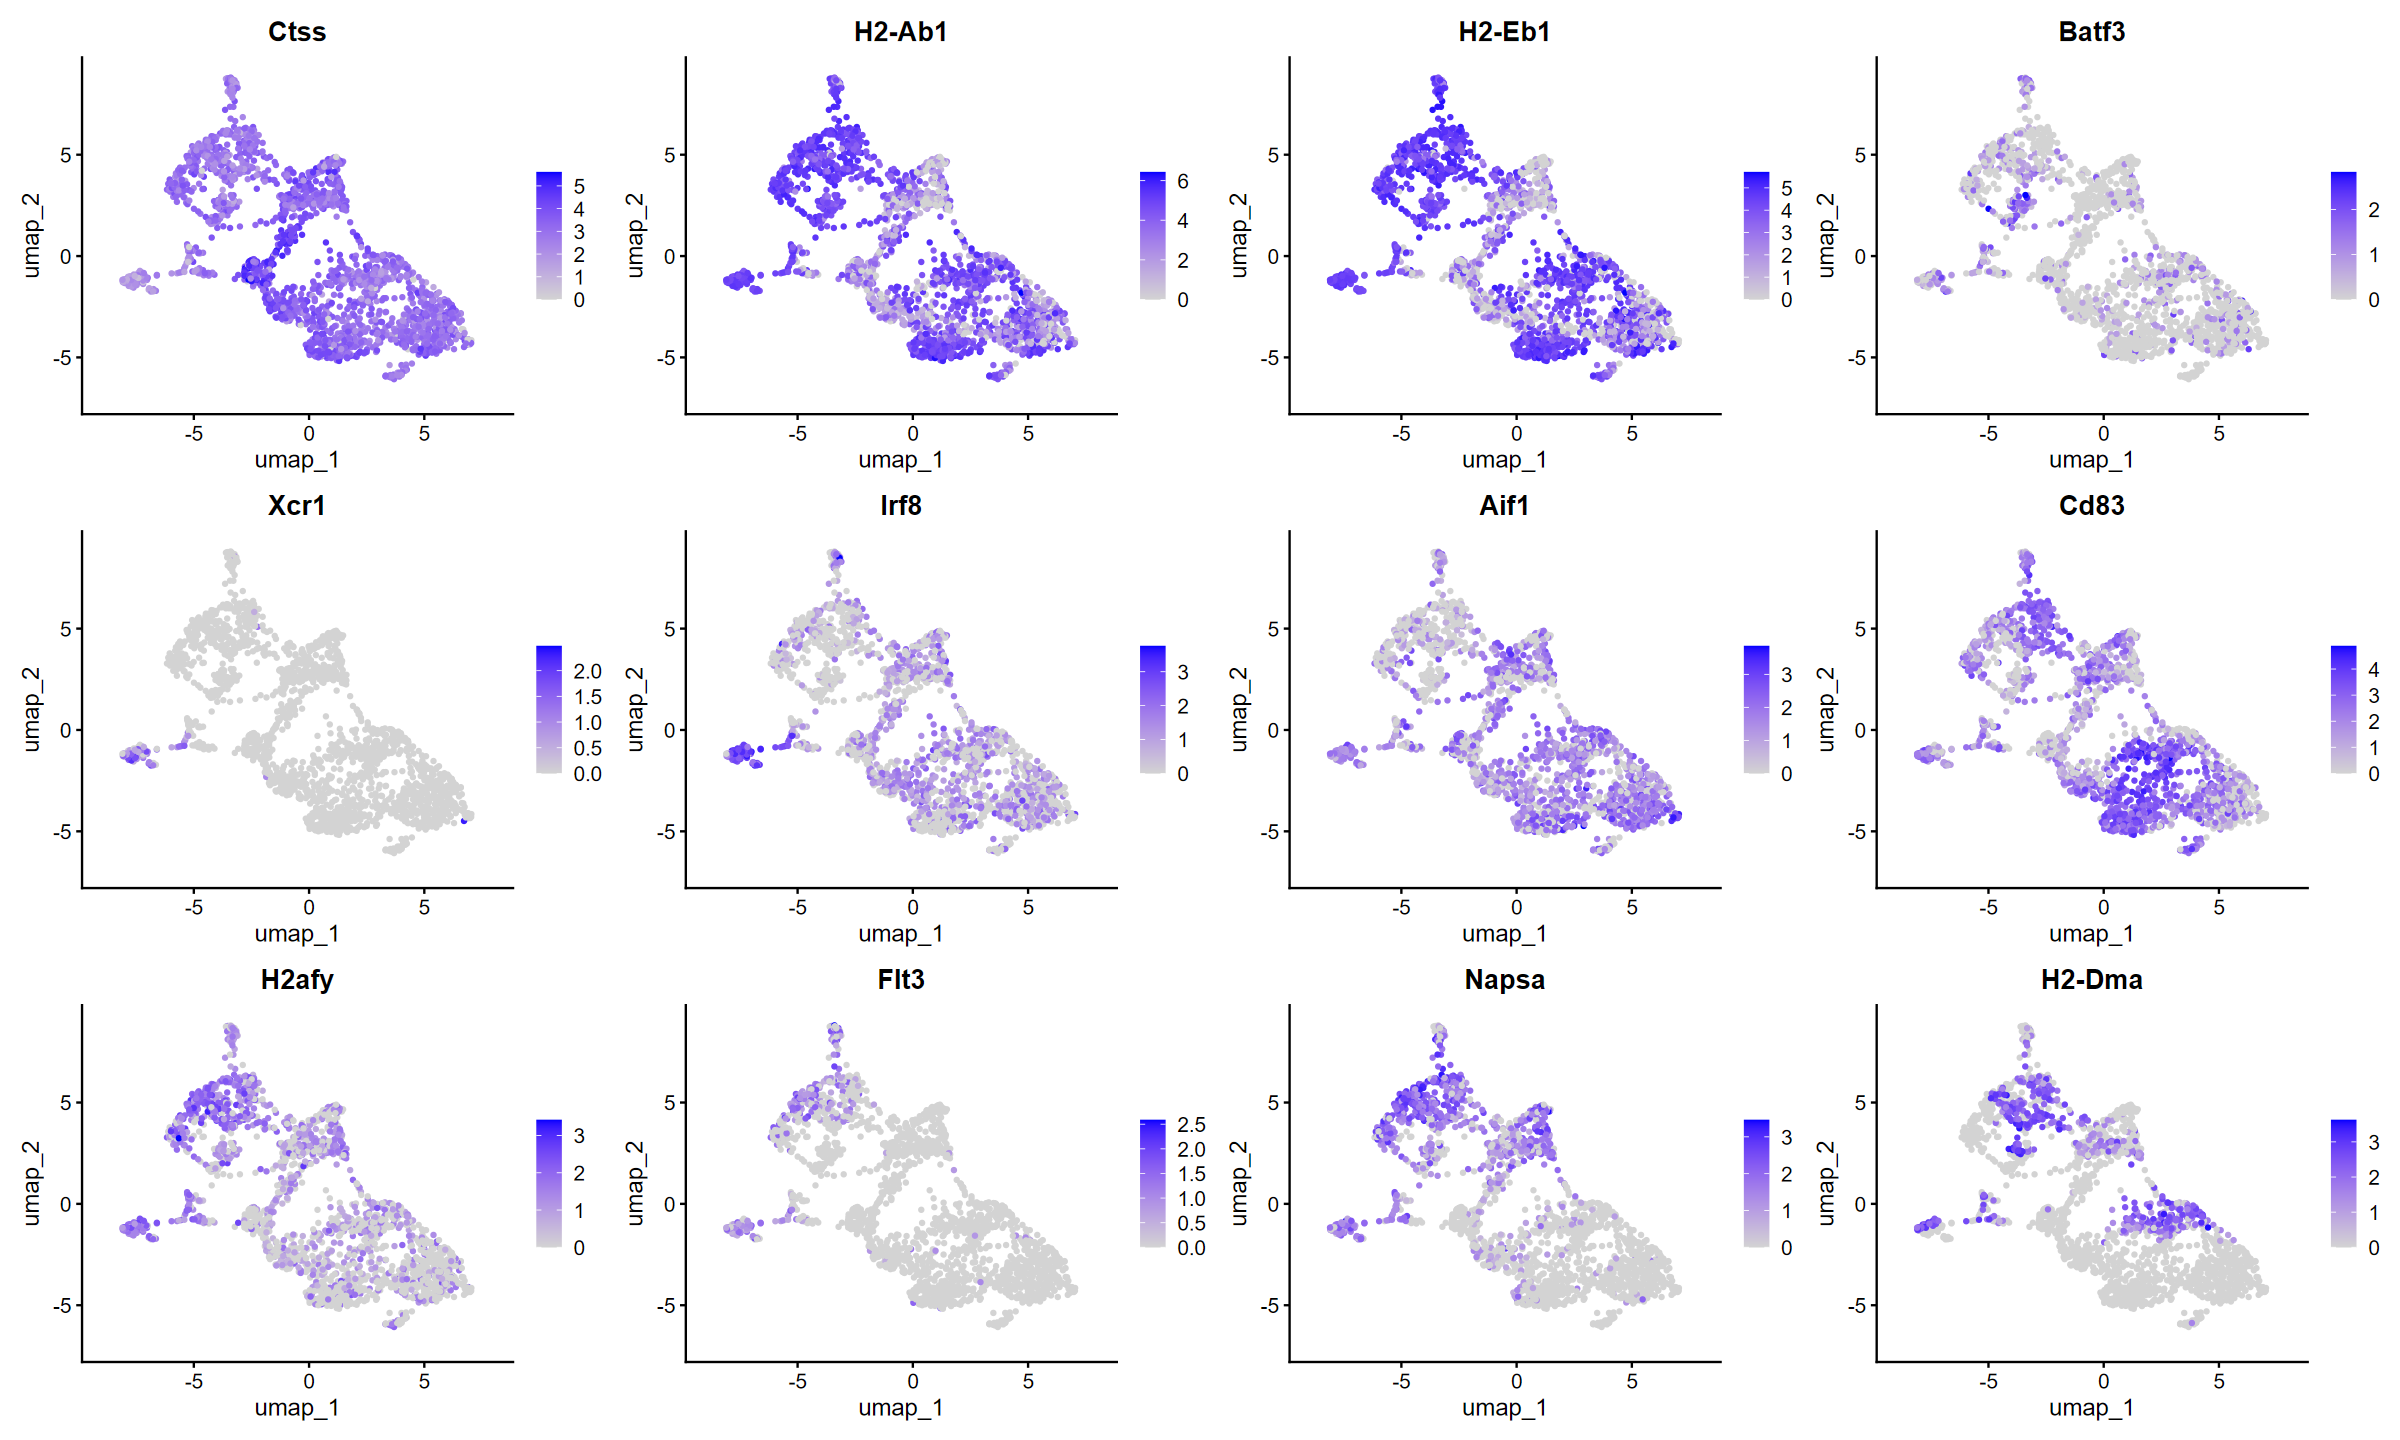

In [ ]:
# Feature plot of DC marker genes
FeaturePlot(myeloid_data, features = features_dcs)

In [377]:
# This cell block is needed to find the different markers between several clusters of which we dont know the identity
myeloid_data <- SetIdent(myeloid_data, value = "seurat_clusters")
markers <- FindMarkers(myeloid_data, ident.1 = "10", ident.2 = "0",  only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 5) %>%
  ungroup() -> top10

# Markers
markers %>% filter(p_val_adj < 0.05) %>% slice_max(order_by = avg_log2FC, n = 8) %>% arrange(desc(pct.1))

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
Ear2          1.536861e-90 8.334979   0.957 0.007 4.712323e-86
Upb1          5.822098e-60 9.389566   0.609 0.000 1.785172e-55
Rpl13-Ps3     1.689608e-53 9.106194   0.565 0.002 5.180678e-49
H2-Dmb2       2.194422e-53 9.981964   0.543 0.000 6.728537e-49
Ryr1          3.274099e-51 8.704667   0.522 0.000 1.003904e-46
Hr            6.848377e-47 8.342483   0.478 0.000 2.099849e-42
4930523c07rik 4.811014e-32 7.843038   0.326 0.000 1.475153e-27
Slc27a3       7.066749e-28 8.172339   0.283 0.000 2.166807e-23

In [ ]:
# Set openai key
Sys.setenv(OPENAI_API_KEY = 'use your own key')

# Cell type annotation with GPT, for interest
res <- gptcelltype(
    markers, 
    tissuename = 'Atherosclerotic mouse aorta. Only macrophages, monocytes or dendritic cells.',
    model = 'gpt-4o')

# Assign cell type annotation back to Seurat object
myeloid_data@meta.data$celltype <- as.factor(res[as.character(Idents(myeloid_data))])

[1] "Note: OpenAI API key found: returning the cell type annotations."
[1] "Note: It is always recommended to check the results returned by GPT-4 in case of\n AI hallucination, before going to down-stream analysis."


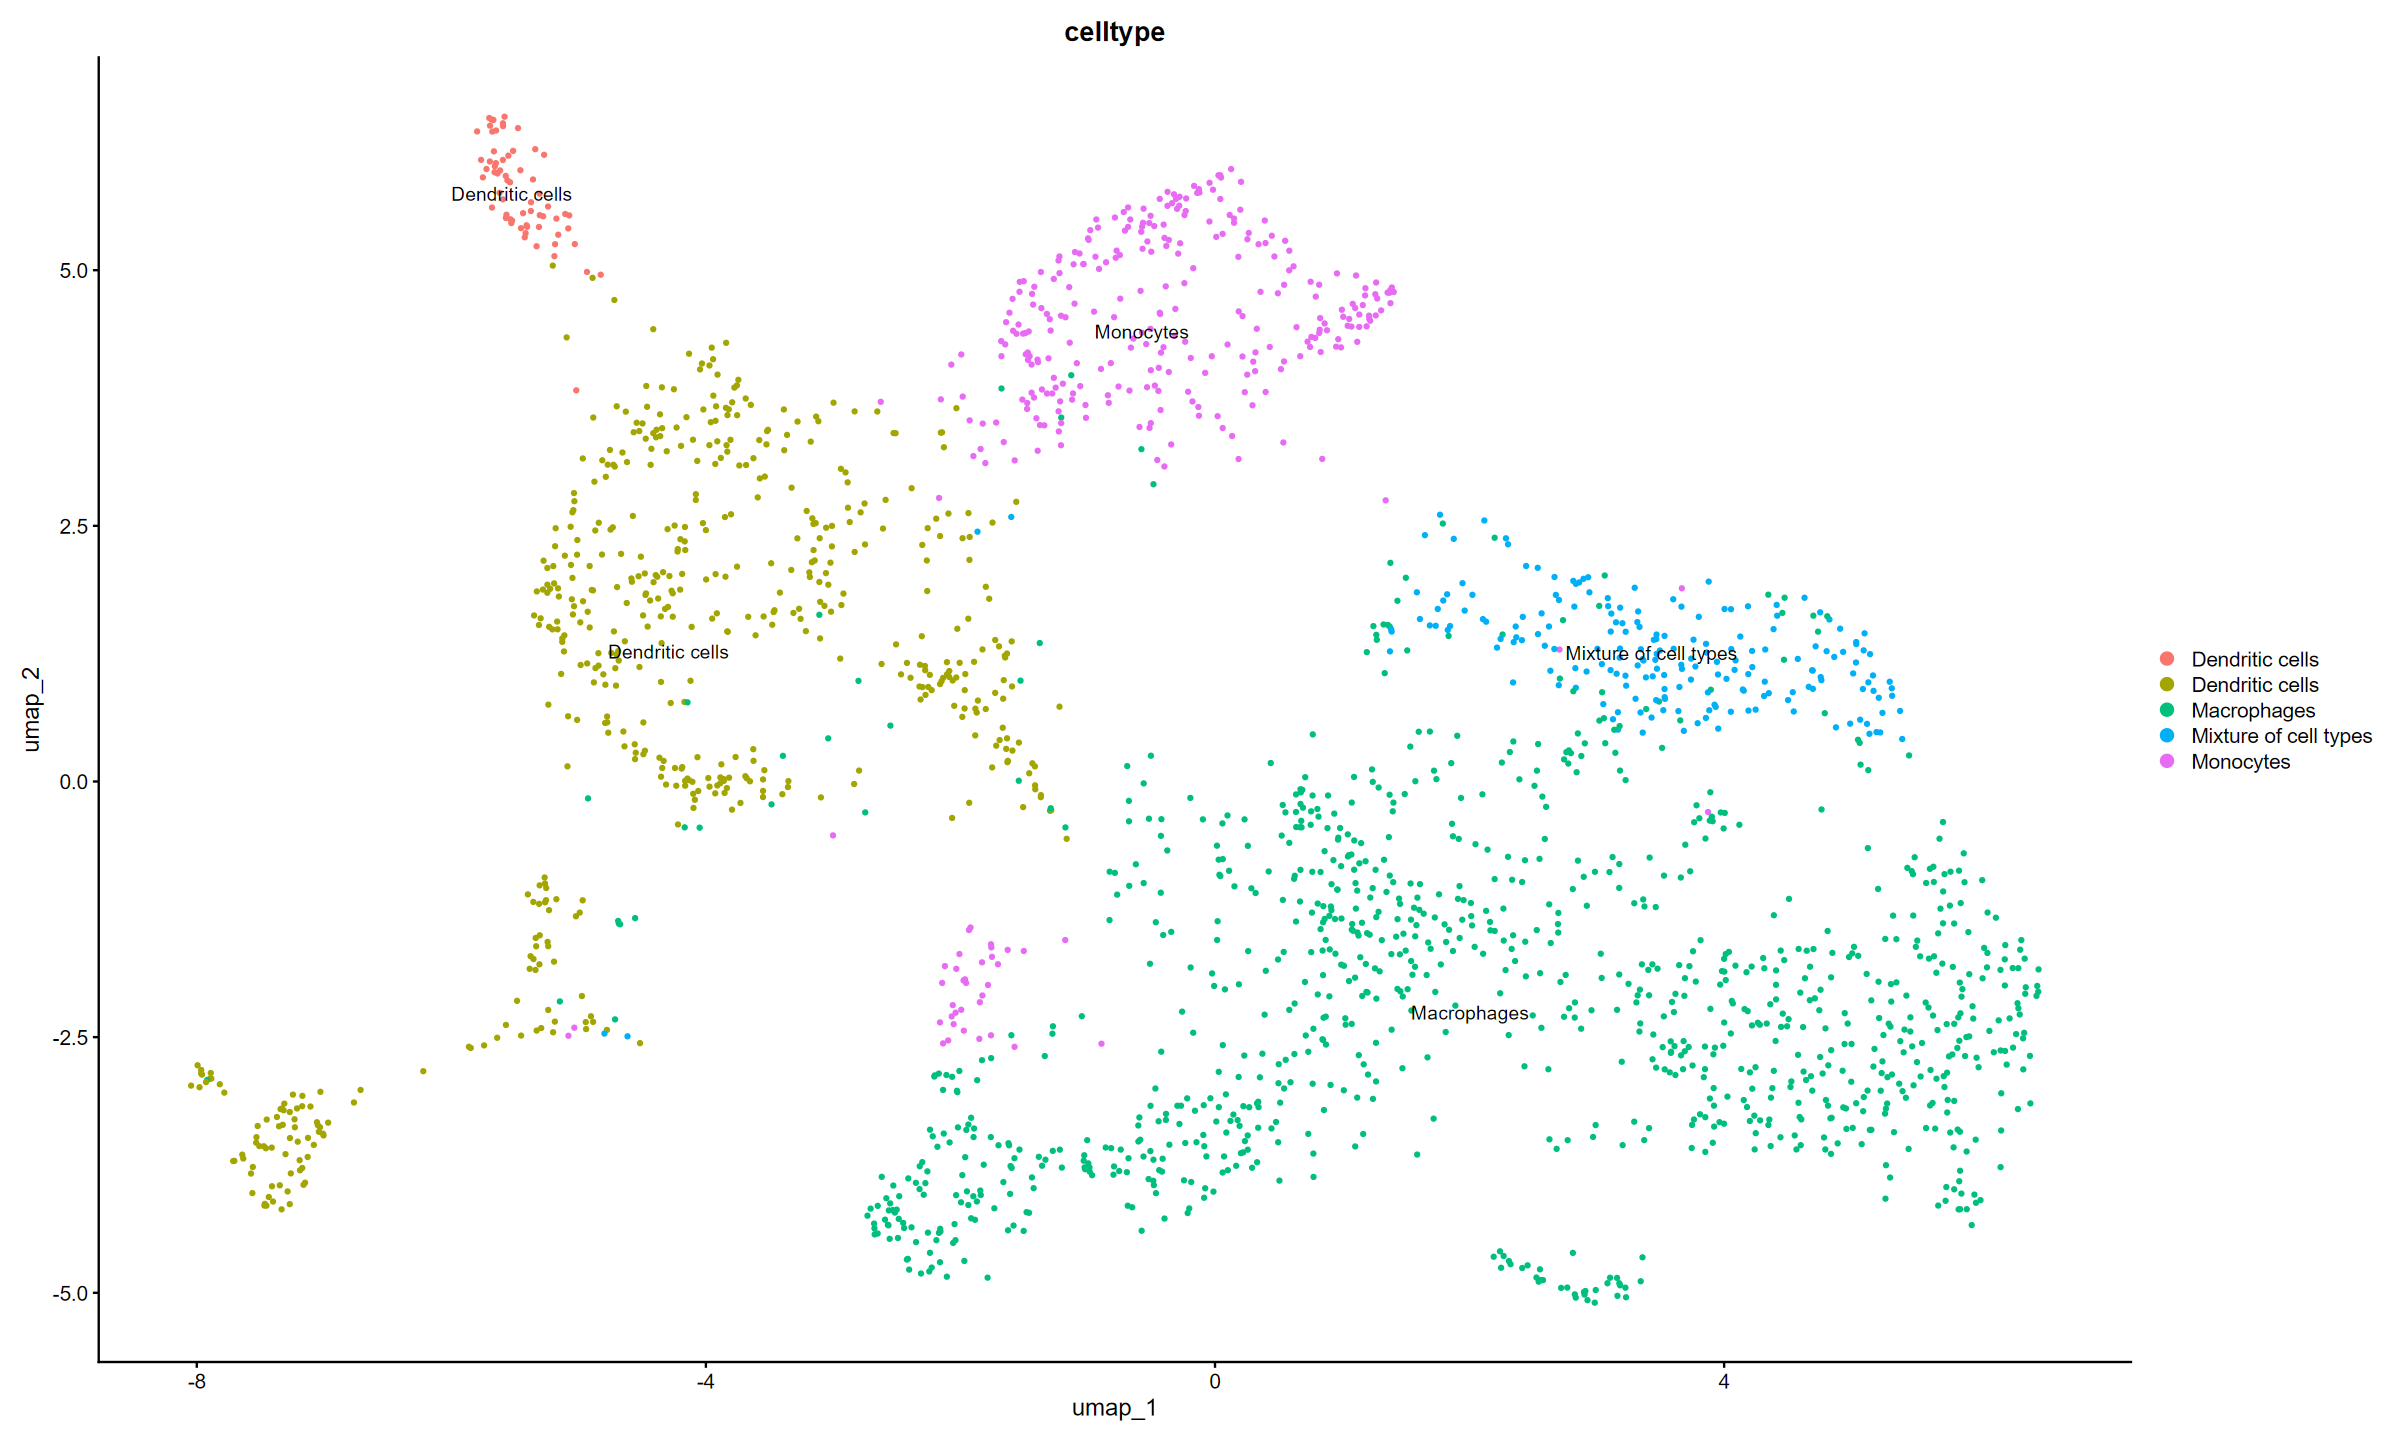

In [ ]:
# Visualize cell type annotation on UMAP
DimPlot(myeloid_data, reduction="umap", group.by='celltype', label=TRUE)

In [45]:
# Assign new labels
myeloid_data <- SetIdent(myeloid_data, value = "seurat_clusters")
myeloid_data <- RenameIdents(myeloid_data,
                                   '0' = 'Macrophages',
                                   '1' = 'Monocyte derived DCs',
                                   '2' = 'Monocytes', 
                                   '3' = 'Macrophages',
                                   '4' = 'Macrophages',
                                   '5' = 'Dendritic cells (cDC1)', #Not sure :(
                                   '6' = 'Dendritic cells (CCR7 DCs)') 
# Proportion tables
annotations_per_origin <- table(Idents(myeloid_data), myeloid_data$orig.ident)
annotations_per_origin_prop <- prop.table(table(Idents(myeloid_data), myeloid_data$orig.ident), margin = 2) * 100

# Subtype plots after annotation
subtype_annotated_plot <- DimPlot(myeloid_data, reduction = "umap", label = TRUE)
subtype_origin_plot <- DimPlot(myeloid_data, reduction = "umap", group.by = "orig.ident", label = TRUE)


# Combine tables side by side
combined_df <- cbind(annotations_per_origin, annotations_per_origin_prop)

Healthy (CD20, CD8, CHOW) HFD 10/11 HFD/ WD 20
Macrophages                112                       397       733       
Monocyte derived DCs        74                       161       193       
Monocytes                   60                       165        93       
Dendritic cells (cDC1)      23                        58        36       
Dendritic cells (CCR7 DCs)   5                        31        28       
                           Healthy (CD20, CD8, CHOW) HFD 10/11 HFD/ WD 20
Macrophages                40.875912                 48.891626 67.682364 
Monocyte derived DCs       27.007299                 19.827586 17.820868 
Monocytes                  21.897810                 20.320197  8.587258 
Dendritic cells (cDC1)      8.394161                  7.142857  3.324100 
Dendritic cells (CCR7 DCs)  1.824818                  3.817734  2.585411

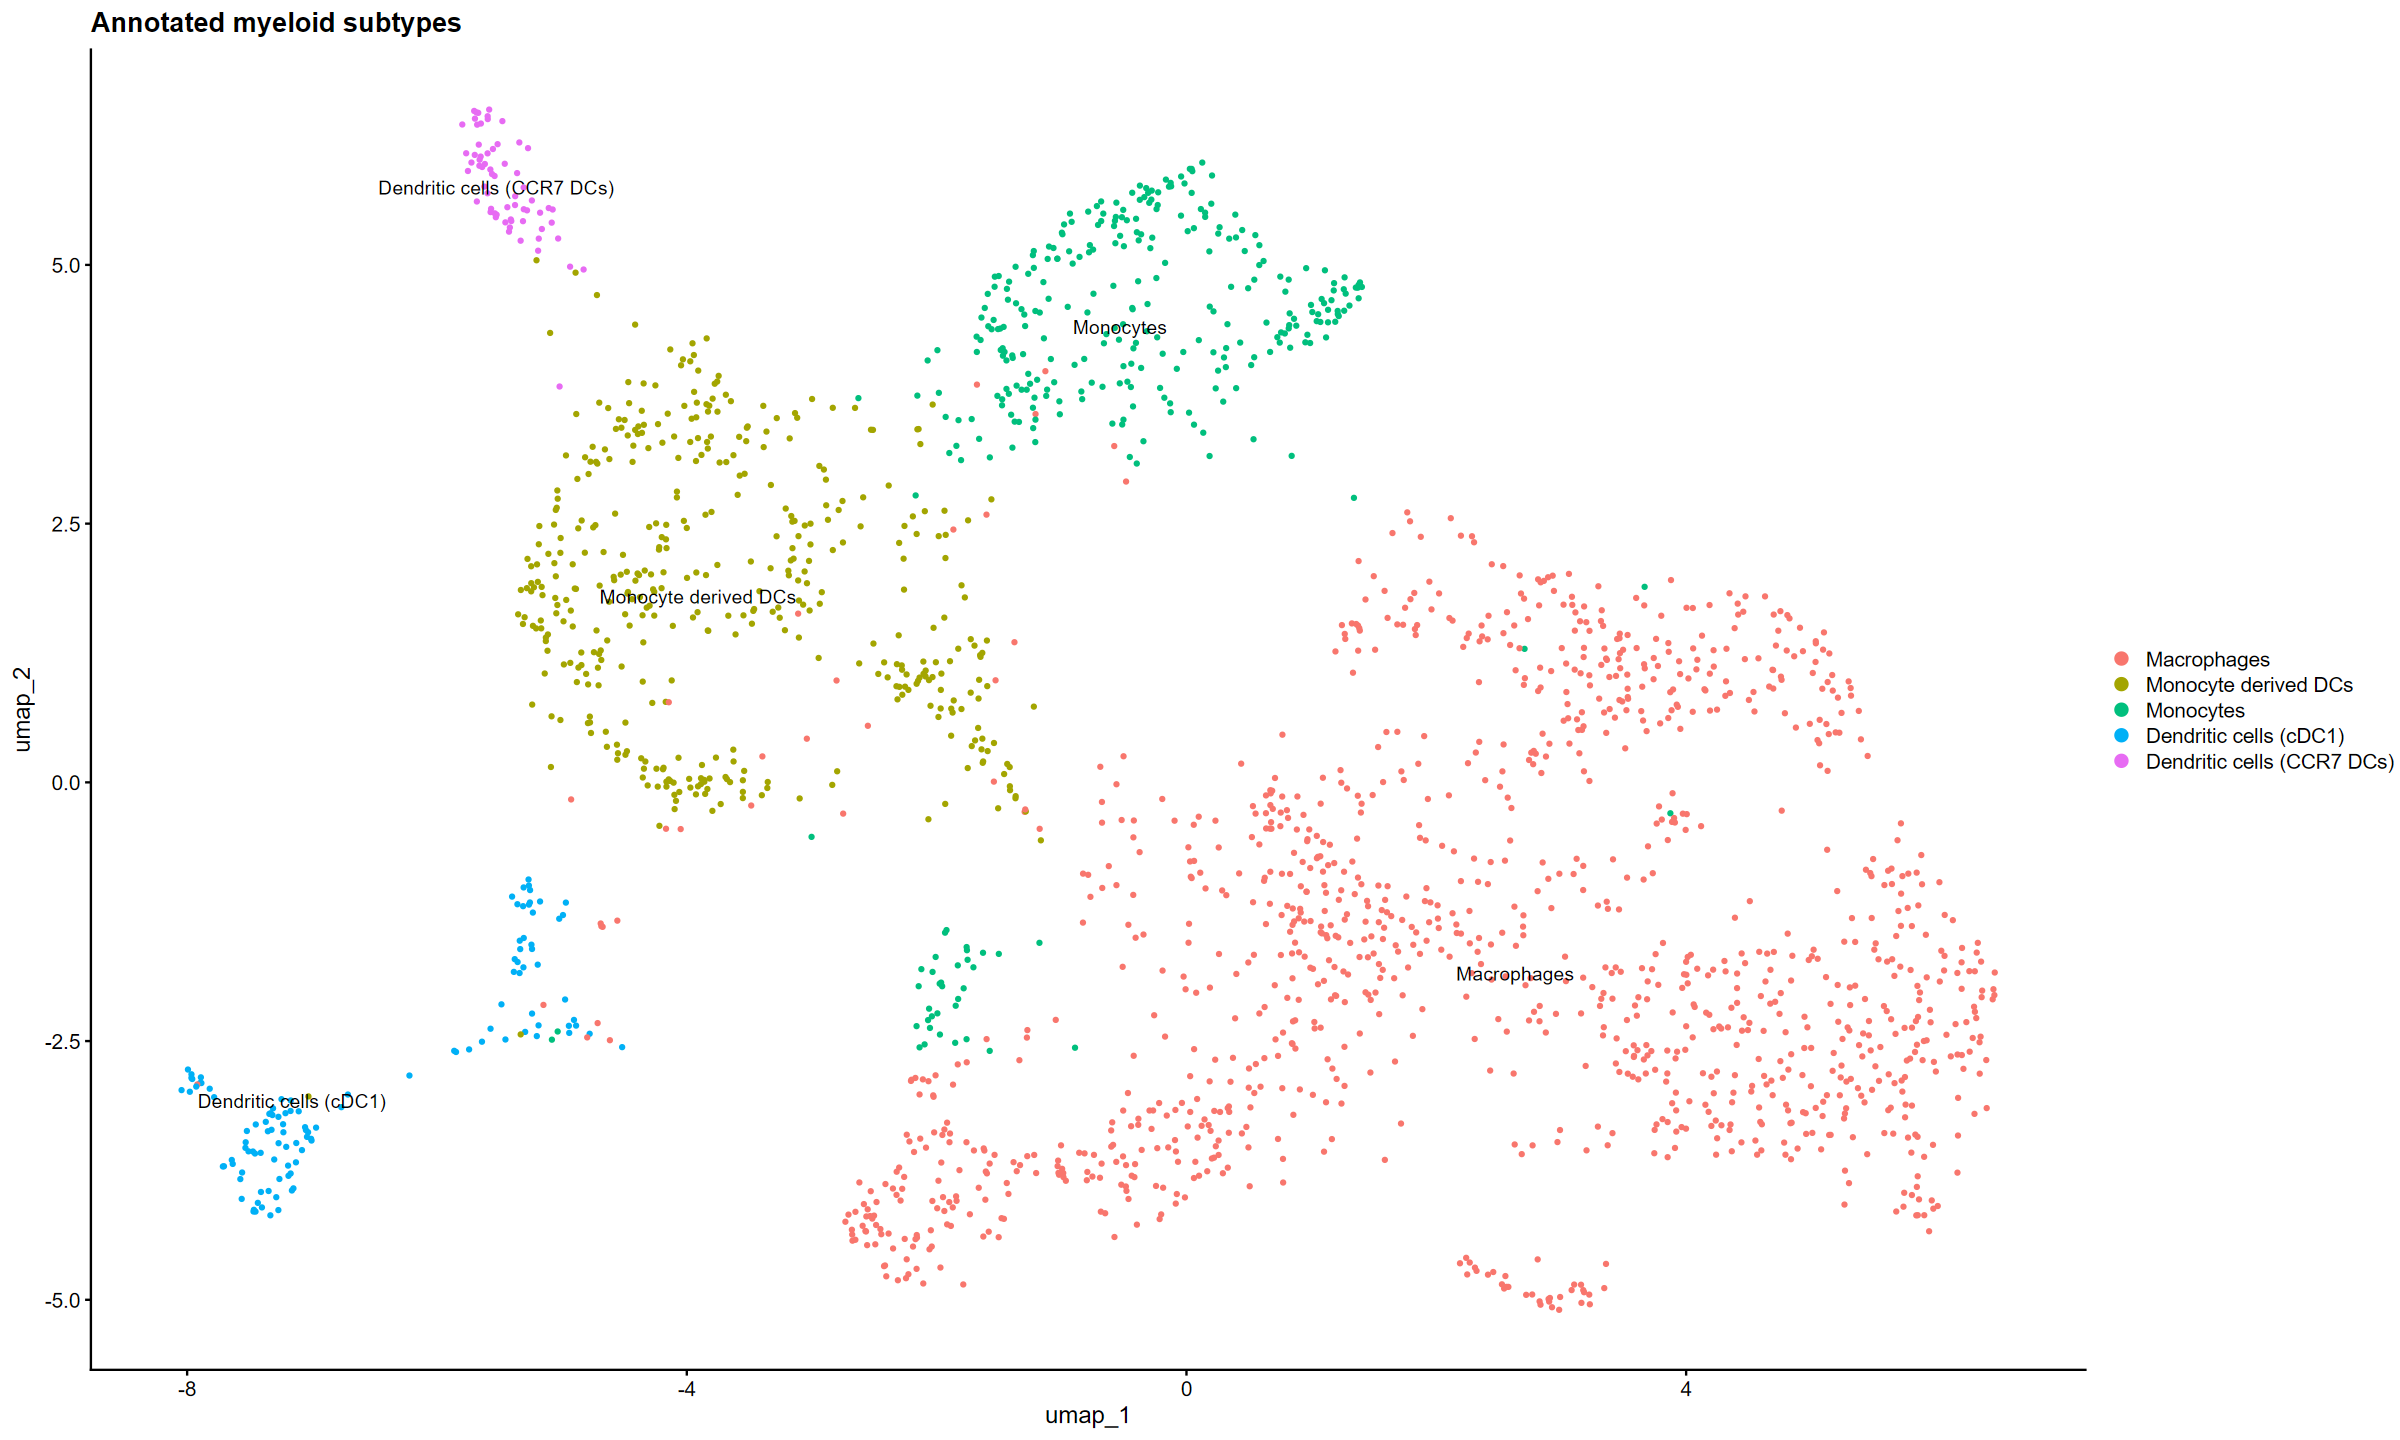

In [46]:
# Plot table
combined_df

# Plotting annotations and titles
grid.arrange(
    subtype_annotated_plot + ggtitle("Annotated myeloid subtypes")
    #subtype_origin_plot + ggtitle("DimPlot by origin")
    #ncol=1
)

In [422]:
macrophage_data <- subset(myeloid_data, idents = "Macrophages")

In [425]:
saveRDS(macrophage_data, "Myeloid_data_annotated.rds")